In [13]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

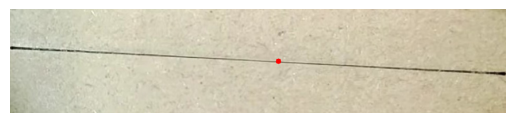

In [14]:
###FINDING THIN POINT
img=cv2.imread("lineC.jpg")
ruler = cv2.imread('ruler.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
if lines is None or len(lines) == 0:
    raise ValueError("No lines detected.")
center_img = (img.shape[1] // 2, img.shape[0] // 2)

def center_dist(x, y):
    return np.sqrt((x - center_img[0])**2 + (y - center_img[1])**2)

thin_point = min(lines, key=lambda line: center_dist((line[0, 0] + line[0, 2]) // 2, (line[0, 1] + line[0, 3]) // 2))

thin_image = img.copy()
x, y = (thin_point[0, 0] + thin_point[0, 2]) // 2, (thin_point[0, 1] + thin_point[0, 3]) // 2
cv2.circle(thin_image, (x, y), 5, (0, 0, 255), -1)

height, width, _ = img.shape
focus_ruler_resized = cv2.resize(ruler, (width, int(ruler.shape[0] * width / ruler.shape[1])))
plt.imshow(cv2.cvtColor(thin_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


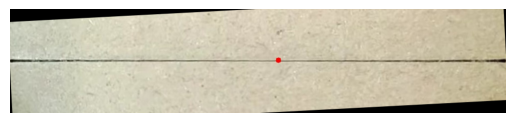

In [17]:
###ROTATING THE LINE TO MAKE IT STRAIGHT

image = cv2.imread('Thin_image.jpg')
line_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lines = cv2.HoughLines(cv2.Canny(line_gray, 50, 150, apertureSize=3), 1, np.pi / 180, 100)

line_image = np.copy(image)
for rho, theta in lines[:, 0]:
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a * rho, b * rho
    x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
    x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

angle = np.degrees(lines[0][0][1])
angle += 90 if angle < 45 else -90
h, w = image.shape[:2]
center = (w // 2, h // 2)
rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D(center, angle, 1.0), (w, h), flags=cv2.INTER_LINEAR)
# cv2.imwrite("rotate.jpg",rotated_image)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [18]:
###COMBINING BOTH LINE IMG AND RULER IMG

merged_image = np.vstack((focus_ruler_resized, rotated_image))


In [19]:
###MAPPING THIN POINT DETECTED TO FOCUS RULER.

thin_point_ratio = x / thin_image.shape[1]

# Calculate the corresponding x-coordinate on the focus ruler image
focus_ruler_x = int(thin_point_ratio * focus_ruler_resized.shape[1])

# Drawing a line on the ruler w.r.t thinnest point on the ruler
image_with_line = merged_image.copy()
cv2.line(image_with_line, (focus_ruler_x, 0), (focus_ruler_x, focus_ruler_resized.shape[0]), (255, 0, 0), 2)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

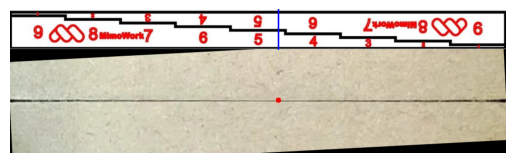

Value aligned with the point: 5 mm


In [20]:
image_with_line = cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB)
plt.imshow(image_with_line)
plt.axis('off') 
plt.show()

#Dividing the ruler into 9 parts
ruler_length_inches = 9  

# Calculating the pixel width of each inch on the ruler image
inch_width_pixels = focus_ruler_resized.shape[1] / ruler_length_inches

# Calculating the position of the line in inches
line_position_inches = ruler_length_inches-(focus_ruler_x / inch_width_pixels)

# Print the exact value with decimal
print("Value aligned with the point:",math.ceil( line_position_inches), "mm")
